IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Data Dictionary

Age: Age of employee

Attrition: Employee attrition status

Department: Department of work

DistanceFromHome

Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;

EducationField

EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

MaritalStatus

MonthlyIncome

NumCompaniesWorked: Number of companies worked prior to IBM

WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;

YearsAtCompany: Current years of service in IBM

Analysis Task:
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

Find the age distribution of employees in IBM

Explore attrition by age

Explore data for Left employees

Find out the distribution of employees by the education field

Give a bar chart for the number of married and unmarried employees

- Build up a logistic regression model to predict which employees are likely to attrite.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [33]:
data=pd.read_csv('/Users/epibinu/Downloads/IBM Attrition Data.csv')
data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [34]:
data.shape

(1470, 13)

In [35]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [37]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [38]:
data.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [39]:
age=data['Age']
age

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [40]:
age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [41]:
age.max()

60

In [42]:
age.min()

18

In [43]:
age.sum()

54278

In [44]:
data['Age'].mean()

36.923809523809524

In [45]:
data['Age'].median()

36.0

<AxesSubplot:>

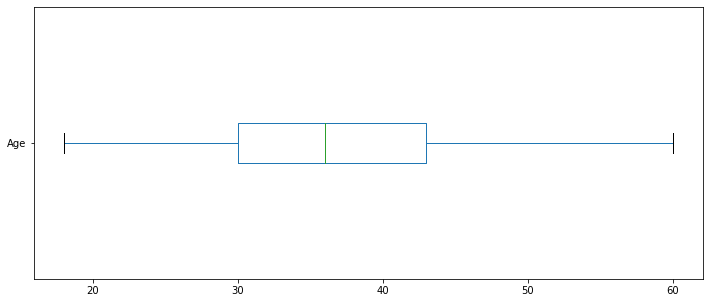

In [46]:
data['Age'].plot(kind='box', vert=False, figsize=(12,5))

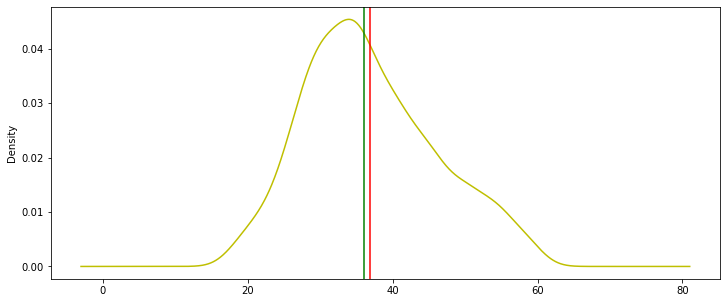

In [49]:
ax=data['Age'].plot(kind='density', figsize=(12,5), color = 'y')
ax.axvline(data['Age'].mean(),color='r')
ax.axvline(data['Age'].median(),color='g')

In [48]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [58]:
employee=data[['Department','EducationField','MaritalStatus','MonthlyIncome']].groupby(['MaritalStatus']).describe().unstack()
employee

                      MaritalStatus
MonthlyIncome  count  Divorced           327.000000
                      Married            673.000000
                      Single             470.000000
               mean   Divorced          6786.287462
                      Married           6793.671620
                      Single            5889.472340
               std    Divorced          4845.647590
                      Married           4859.686276
                      Single            4325.571133
               min    Divorced          1129.000000
                      Married           1052.000000
                      Single            1009.000000
               25%    Divorced          3015.000000
                      Married           3022.000000
                      Single            2722.000000
               50%    Divorced          5131.000000
                      Married           5204.000000
                      Single            4536.000000
               75%    Divorc

In [59]:
employee.describe()

count       24.000000
mean      6145.961934
std       5936.308287
min        327.000000
25%       2323.750000
50%       4852.666933
75%       6927.316215
max      19999.000000
dtype: float64

In [60]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [70]:
corr=data.corr()
corr

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


<AxesSubplot:>

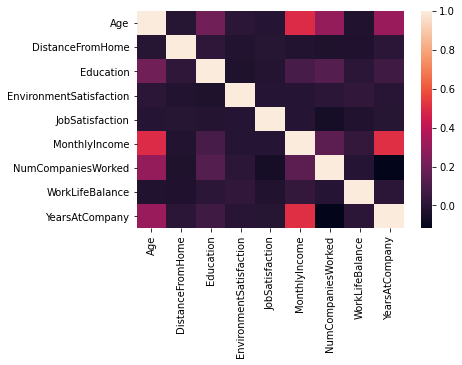

In [71]:
sns.heatmap(corr)

In [73]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [76]:
education=data['EducationField'].value_counts()
education

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

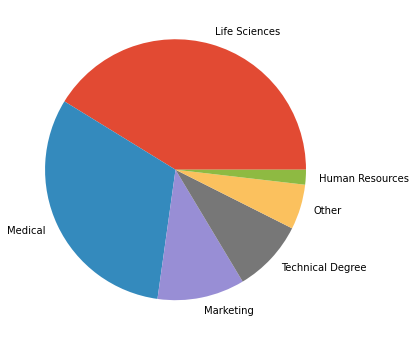

In [80]:
style.use('ggplot')
plt.figure(figsize=(6,6))
label=['Life Sciences', 'Medical', 'Marketing','Technical Degree','Other','Human Resources']
plt.pie(education, labels=label)
plt.show()

In [83]:
employee.aggregate

<bound method Series.aggregate of                       MaritalStatus
MonthlyIncome  count  Divorced           327.000000
                      Married            673.000000
                      Single             470.000000
               mean   Divorced          6786.287462
                      Married           6793.671620
                      Single            5889.472340
               std    Divorced          4845.647590
                      Married           4859.686276
                      Single            4325.571133
               min    Divorced          1129.000000
                      Married           1052.000000
                      Single            1009.000000
               25%    Divorced          3015.000000
                      Married           3022.000000
                      Single            2722.000000
               50%    Divorced          5131.000000
                      Married           5204.000000
                      Single            4536.0

<AxesSubplot:>

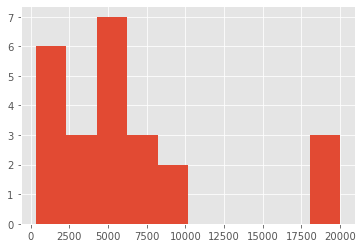

In [85]:
employee.hist()

In [86]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [89]:
data['MaritalStatus']


0        Single
1       Married
2        Single
3       Married
4       Married
         ...   
1465    Married
1466    Married
1467    Married
1468    Married
1469    Married
Name: MaritalStatus, Length: 1470, dtype: object

In [95]:
data.loc[data['MaritalStatus']=='Married'].value_counts()

Age  Attrition  Department              DistanceFromHome  Education  EducationField   EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany
22   No         Research & Development  1                 2          Life Sciences    4                        4                Married        4775           6                   1                2                 1
41   No         Sales                   1                 3          Marketing        2                        1                Married        8392           1                   3                10                1
                Human Resources         1                 3          Human Resources  4                        3                Married        19189          1                   3                22                1
                                        4                 3          Human Resources  3                        2                Married        64

In [98]:
marital_status=data.groupby('MaritalStatus')
married=marital_status.get_group('Married')
married

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
6,59,No,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
9,36,No,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [99]:
married.shape

(673, 13)

<AxesSubplot:>

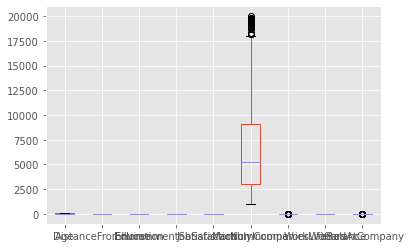